In [1]:
!pip install bnlp_toolkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.0 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=a3c45bbfbc25923e3b83759a29b7ce1b008f4feffaccdf4d53c6cb96443a2cd6
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 2.10.0
    Uninstalling emoji-2.10.0:
      Successfully uninstalled emoji-2.10.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from bnlp import NLTKTokenizer

In [3]:
df_train = pd.read_excel("/kaggle/input/sentnob-bspell/sentnob_train.xlsx")

In [4]:
df_train.head()

,Text,Label
0,মুগ্ধ হয়ে গেলাম মামু. আর তোমায় কি কমু. বলো তোম...,1
1,এই কুত্তার বাচ্চাদের জন্য দেশটা আজ এমন অবস্তা...,2
2,ভাই আপনার কথাই যাদু রয়েছে,1
3,উওরটা আমার অনেক ভালো লেগেছে,1
4,আমার নিজের আমার নিয়ে কি সাজেক যেতে অনেক না? প...,0


In [5]:
df_train.dropna(inplace=True)

In [6]:
longest_string = max(df_train["Text"], key=len)
print(len(longest_string))

374


In [7]:
df_train['Label'].value_counts()

Label
1    5133
2    4548
0    2894
Name: count, dtype: int64

In [8]:
df_train['Label'] = df_train['Label'].replace({0: 'Neutral', 1: 'Positive', 2: 'Negative'})

In [9]:
df_val = pd.read_excel("/kaggle/input/sentnob-bspell/sentnob_val.xlsx")

In [10]:
df_val.dropna(inplace=True)

In [11]:
df_val['Label'].value_counts()

Label
1    623
2    590
0    354
Name: count, dtype: int64

In [12]:
df_val['Label'] = df_val['Label'].replace({0: 'Neutral', 1: 'Positive', 2: 'Negative'})

In [13]:
df_val['Label'].value_counts()

Label
Positive    623
Negative    590
Neutral     354
Name: count, dtype: int64

In [14]:
df_train.tail(10)

,Text,Label
12565,সারা বাংলাদেশের মানুষের একটা দাবি ভুয়া লটারি ...,Positive
12566,ডিসেমবরে শেষের দিকে গেলে বরফ শেষের দাদা,Neutral
12567,অনেক সুন্দর রাস্তা দিকে যা এখন পর্যন্ত দেখলাম...,Positive
12568,""" আমি বুজতে পারি না , ওরা আমাদেরকে তিস্তার পা...",Neutral
12569,জত দিন জাচ্ছে তত আপনাদের ভিডিও বের হচ্ছে দেখে...,Positive
12570,বর্ডারে অনেক লেট হয়ে যাওয়াতে আমরা জিপে করে চল...,Positive
12571,আমার সোনার বাংলা এমন রক্ষক নামের পৌঁছানো কোনো...,Negative
12572,""" ওনারা এত এত ও এত সুন্দর পরিবেশে রান্না করে ...",Positive
12573,বাংলাদেশ আমরা পুলিশ চাই না এই ধরনে পুলিশ দরকা...,Negative
12574,বসুন্ধরা শাখার হাজি বিরিয়ানি একবারেই ফালতু,Negative


In [15]:
# from sklearn.model_selection import train_test_split

# train_df, test_df = train_test_split(, test_size=0.2,stratify=df['classes'],random_state=42)


In [16]:
X_train  =  df_train['Text'].values.tolist()
y_train = df_train['Label'].tolist()

In [17]:
X_test =  df_val['Text'].values.tolist()
y_test = df_val['Label'].tolist()

In [18]:
pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 55.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 40.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 24.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 11.6 MB/s eta 0:00:00
  Created wheel for ktrain: filename=ktrain-0.40.0-py3-none-any.whl size=25319454 sha256=e871c3b6a5dc264eed1c7b39519be6910e9cc3936683e4ed48c9e9081a148253
  Stored in directory: /roo

In [19]:
import ktrain
from ktrain import text
MODEL_NAME = 'csebuetnlp/banglabert'
t = text.Transformer(MODEL_NAME, maxlen=500)

config.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

In [20]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 15
	95percentile : 36
	99percentile : 46


tokenizer_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/528k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 16
	95percentile : 36
	99percentile : 45


In [21]:
print(trn)

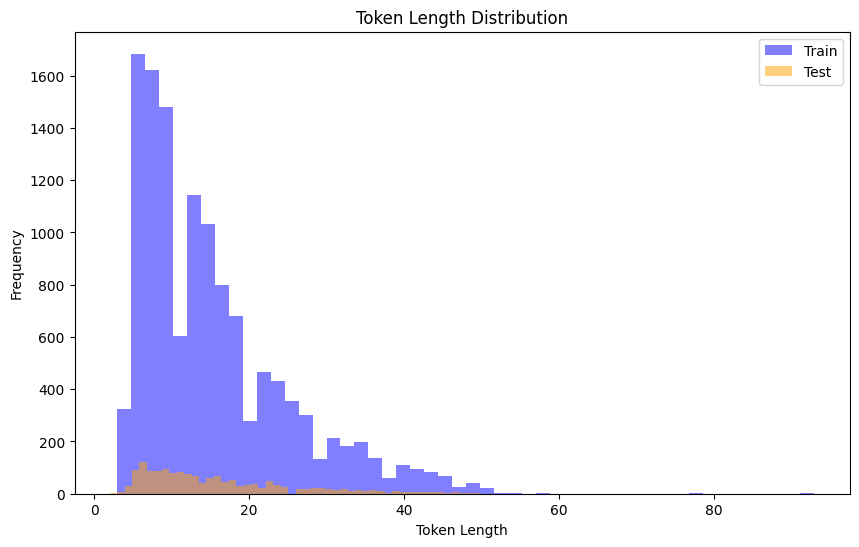

In [22]:
import matplotlib.pyplot as plt

# Calculate token lengths for train and test datasets
train_token_lengths = [len(t.split()) for t in X_train]
test_token_lengths = [len(t.split()) for t in X_test]

# Plot token length distribution
plt.figure(figsize=(10, 6))
plt.hist(train_token_lengths, bins=50, alpha=0.5, color='blue', label='Train')
plt.hist(test_token_lengths, bins=50, alpha=0.5, color='orange', label='Test')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Token Length Distribution')
plt.legend()
plt.show()

In [23]:
model = t.get_classifier()

In [24]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=8)

In [25]:
# Adding early stopping callback from TensorFlow
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='accuracy', patience=5, mode='auto')

In [26]:
history = learner.fit_onecycle(2e-5, 10,callbacks=[early_stopping])



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/10
1572/1572 [==============================] - 912s 564ms/step - loss: 0.8758 - accuracy: 0.6037 - val_loss: 0.7317 - val_accuracy: 0.6828
Epoch 2/10
1572/1572 [==============================] - 883s 562ms/step - loss: 0.6821 - accuracy: 0.7117 - val_loss: 0.6571 - val_accuracy: 0.7160
Epoch 3/10
1572/1572 [==============================] - 882s 561ms/step - loss: 0.5581 - accuracy: 0.7769 - val_loss: 0.6754 - val_accuracy: 0.7358
Epoch 4/10
1572/1572 [==============================] - 882s 561ms/step - loss: 0.4274 - accuracy: 0.8392 - val_loss: 0.7401 - val_accuracy: 0.7269
Epoch 5/10
1572/1572 [==============================] - 882s 561ms/step - loss: 0.3151 - accuracy: 0.8856 - val_loss: 0.8449 - val_accuracy: 0.7211
Epoch 6/10
1572/1572 [==============================] - 882s 561ms/step - loss: 0.2128 - accuracy: 0.9266 - val_loss: 0.9731 - val_accuracy: 0.7428
Epoch 7/10
1572/1572 [===========================

In [27]:
# Save the trained model
learner.save_model('/kaggle/output/bemoc.zip')

In [28]:
classes=t.get_classes()

In [29]:
cm = learner.validate(class_names=t.get_classes())

49/49 [==============================] - 8s 104ms/step
              precision    recall  f1-score   support

    Negative       0.81      0.78      0.79       590
     Neutral       0.56      0.51      0.54       354
    Positive       0.75      0.82      0.78       623

    accuracy                           0.73      1567
   macro avg       0.71      0.70      0.70      1567
weighted avg       0.73      0.73      0.73      1567



In [30]:
import os
import subprocess
from IPython.display import FileLink, display

def download_file(path, download_file_name):
    os.chdir('/kaggle/working/')
    zip_name = f"/kaggle/working/{download_file_name}.zip"
    command = f"zip {zip_name} {path} -r"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    if result.returncode != 0:
        print("Unable to run zip command!")
        print(result.stderr)
        return
    display(FileLink(f'{download_file_name}.zip'))

In [31]:
!zip -r mental.zip /kaggle/output/mental-health-rand

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


	zip warning: name not matched: /kaggle/output/mental-health-rand

zip error: Nothing to do! (try: zip -r mental.zip . -i /kaggle/output/mental-health-rand)


In [32]:
!ls

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


__notebook__.ipynb


In [33]:
# from IPython.display import FileLink
# FileLink(r'/kaggle/working/mental-health-rand.zip')

In [34]:
# df_cm = pd.DataFrame(cm, index=["Anxiety","Bipolar","Borderline Personality", "Depression ", "Schizophernia","Suidal Thought","neutral",
#                                 "Alcoholism","Addiction","Aspergers","SelfHarm "],
#                      columns=["Anxiety","Bipolar","Borderline Personality", "Depression ", "Schizophernia","Suidal Thought","neutral",
#                                 "Alcoholism","Addiction","Aspergers","SelfHarm "])
# plt.figure(figsize = (10,7))
# sns.heatmap(df_cm,annot=True, fmt ="d")